<p align="center">
<img src="https://github.com/adelnehme/data-upskilling-learning-club/blob/master/assets/datacamp_amazon.png?raw=true" alt = "DataCamp Amazon icon" width="65%">
</p>


## **Data UpSkilling Learning Club: Introduction to Python**


### **Key session takeaways**

* Import data into Python using `pandas` — Python’s most popular data analysis package.
* Filter, add new columns, and analyse datasets using pandas.
* Present data visualisations using `matplotlib` and `seaborn` — Python's most popular data visualization packages.

### **The Dataset**

The dataset to be used in this webinar is a CSV file named `airbnb.csv`, which contains data on airbnb listings in the state of New York. It contains the following columns:

- `listing_id`: The unique identifier for a listing
- `description`: The description used on the listing
- `host_id`: Unique identifier for a host
- `neighbourhood_full`: Name of boroughs and neighbourhoods
- `coordinates`: Coordinates of listing _(latitude, longitude)_
- `listing_added`: Date of added listing
- `room_type`: Type of room 
- `rating`: Rating from 0 to 5.
- `price`: Price per night for listing
- `number_of_reviews`: Amount of reviews received 
- `reviews_per_month`: Number of reviews per month
- `availability_365`: Number of days available per year
- `number_of_stays`: Total number of stays thus far


## **Getting started**

<font color=00AAFF>*Just like we click and open pre-installed software on any computer OS before running analysis — we import pre-installed packages into Python before using them*<font color=00AAFF>

```
import package_name as package_alias
```

In [142]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<font color=00AAFF>*To import a CSV file into* `pandas` *, we use* <font color=00AAFF>

```
data = pd.read_csv(file_path)
```

<font color=00AAFF>*Check out this [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) for importing other data types.*<font color=00AAFF>


In [143]:
# Read in the dataset
airbnb = pd.read_csv('https://raw.githubusercontent.com/adelnehme/data-upskilling-learning-club/master/data/airbnb.csv', index_col = 0)

<font color=00AAFF>*Some important and common methods needed to get a better understanding of DataFrames and diagnose potential data problems are the following:*<font color=00AAFF>

```
# Show the first 5 rows of the data
airbnb.head()

# Show information on columns and data types
airbnb.info()

# Show distribution of numeric columns
airbnb.describe()
```

In [145]:
# Inspect header of dataset
airbnb.head()

,listing_id,description,host_id,neighbourhood_full,coordinates,room_type,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125.0,"Brooklyn, Flatlands","(40.63222, -73.93398)",private room,45$,10,0.70,85,4.100954,12.0,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113.0,"Manhattan, Upper West Side","(40.78761, -73.96862)",entire home/apt,135$,1,1.00,145,3.367600,1.2,2018-12-25
2,6425850,"Spacious, charming studio",32715865.0,"Manhattan, Upper West Side","(40.79169, -73.97498)",entire home/apt,86$,5,0.13,0,4.763203,6.0,2017-03-20
3,22986519,Bedroom on the lively Lower East Side,154262349.0,"Manhattan, Lower East Side","(40.71884, -73.98354)",private room,160$,23,2.29,102,3.822591,27.6,2020-10-23
4,271954,Beautiful brownstone apartment,1423798.0,"Manhattan, Greenwich Village","(40.73388, -73.99452)",entire home/apt,150$,203,2.22,300,4.478396,243.6,2018-12-15


* _**Problem 1:** Taking a look at the_ `price` _column, it seems it's not a numeric data type_
* _**Problem 2:** We need to extract the Borough from the_ `neighbourhood_full` _column_

In [146]:
# Check description of dataset
airbnb.describe()

,listing_id,host_id,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays
count,7.734000e+03,7.727000e+03,7734.000000,7734.000000,7734.000000,7734.000000,7734.000000
mean,1.838769e+07,6.481466e+07,28.355185,1.353746,114.546160,4.012199,34.026222
std,1.069230e+07,7.610154e+07,46.962275,1.613229,129.862583,0.574812,56.354729
min,3.831000e+03,2.787000e+03,1.000000,0.010000,0.000000,3.000633,1.200000
25%,9.028764e+06,7.155462e+06,3.000000,0.200000,0.000000,3.518918,3.600000
50%,1.930978e+07,2.951896e+07,9.000000,0.710000,54.000000,4.024223,10.800000
75%,2.790623e+07,1.017516e+08,32.000000,2.000000,230.000000,4.514173,38.400000
max,3.635113e+07,2.733615e+08,510.000000,16.220000,365.000000,4.999561,612.000000


In [ ]:
# Check information of dataset
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7734 entries, 0 to 7733
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   listing_id          7734 non-null   int64  
 1   description         7733 non-null   object 
 2   host_id             7727 non-null   float64
 3   neighbourhood_full  7734 non-null   object 
 4   coordinates         7734 non-null   object 
 5   room_type           7734 non-null   object 
 6   price               7734 non-null   object 
 7   number_of_reviews   7734 non-null   int64  
 8   reviews_per_month   7734 non-null   float64
 9   availability_365    7734 non-null   int64  
 10  rating              7734 non-null   float64
 11  number_of_stays     7734 non-null   float64
 12  listing_added       7734 non-null   object 
dtypes: float64(4), int64(3), object(6)
memory usage: 845.9+ KB


* _**Problem 3:** From the output, it seems that we have missing data in_ `host_id`, `description` columns.
* _**Problem 4:** We need to convert_ `listing_added` _column to date column._

## **Data Cleaning**

### **Data cleaning to-do list!**

_Data Type Problems_

- _**Task 1**: Remove_ `$` _from_ `price` _and convert it to_ `float`
- _**Task 2**: Convert_ `listing_added` _to_ `datetime`

<br>

_Text/categorical data problems:_

- _**Task 3**: Extract borough from_ `neighbourhood_full`

<br>

_Dealing with missing data:_

- _**Task 4**: Deal with missing data in_ `host_id` _and_ `description` _columns_

<br>


##### **Task 1:** Remove `$` from `price` and convert it to `float`


<font color="00AAFF"> _To remove a character from a string column, we can use:_ </font>

```
data['column_name'] = data['column_name'].str.strip(character)
```

<font color="00AAFF"> _To convert a numeric column to a float, we can use:_ </font>

```
data['column_name'] = data['column_name'].astype('float')
```

In [ ]:
# Strip $ from price column
airbnb['price'] = airbnb['price'].str.strip('$')

# Convert price column to float
airbnb['price'] = airbnb['price'].astype('float')

# Print header again
airbnb.head()

##### **Task 2:** Convert `listing_added` to `datetime`

<font color="00AAFF"> _To convert a date column to_ </font> `datetime`<font color="00AAFF">_, we can use:_


```
data['column_name'] = pd.to_datetime(data['column_name'])
```

In [150]:
# Convert listing_added to datetime
airbnb['listing_added'] = pd.to_datetime(airbnb['listing_added'])

# Print info again
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7734 entries, 0 to 7733
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   listing_id          7734 non-null   int64         
 1   description         7733 non-null   object        
 2   host_id             7727 non-null   float64       
 3   neighbourhood_full  7734 non-null   object        
 4   coordinates         7734 non-null   object        
 5   room_type           7734 non-null   object        
 6   price               7734 non-null   float64       
 7   number_of_reviews   7734 non-null   int64         
 8   reviews_per_month   7734 non-null   float64       
 9   availability_365    7734 non-null   int64         
 10  rating              7734 non-null   float64       
 11  number_of_stays     7734 non-null   float64       
 12  listing_added       7734 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(3), obje

##### **Task 3:** Extract borough from `neighbourhood_full` column

<font color="00AAFF"> _To split a column into multiple columns, we can use:_</font>

```
split_data = data['column_name'].str.split(',', expand = True)
```


In [ ]:
# Create new DataFrame with split column
borough_neighbourhood = airbnb['neighbourhood_full'].str.split(',', expand = True)

borough_neighbourhood

In [152]:
# Create borough and neighbourhood columns
airbnb['borough'] = borough_neighbourhood[0]
airbnb['neighbourhood'] = borough_neighbourhood[1]

# Print header of columns
airbnb[['neighbourhood_full', 'borough', 'neighbourhood']].head()

,neighbourhood_full,borough,neighbourhood
0,"Brooklyn, Flatlands",Brooklyn,Flatlands
1,"Manhattan, Upper West Side",Manhattan,Upper West Side
2,"Manhattan, Upper West Side",Manhattan,Upper West Side
3,"Manhattan, Lower East Side",Manhattan,Lower East Side
4,"Manhattan, Greenwich Village",Manhattan,Greenwich Village


In [ ]:
# Drop original neighbourhood_full column
airbnb.drop('neighbourhood_full', axis = 1 , inplace = True)

In [ ]:
# Find missing values
airbnb.isna().sum()

listing_id           0
description          1
host_id              7
coordinates          0
room_type            0
price                0
number_of_reviews    0
reviews_per_month    0
availability_365     0
rating               0
number_of_stays      0
listing_added        0
borough              0
neighbourhood        0
dtype: int64

In [ ]:
airbnb = airbnb.dropna()

In [ ]:
airbnb = airbnb.reset_index(drop = True)
airbnb

,listing_id,description,host_id,coordinates,room_type,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,listing_added,borough,neighbourhood
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125.0,"(40.63222, -73.93398)",private room,45.0,10,0.70,85,4.100954,12.0,2018-06-08,Brooklyn,Flatlands
1,22005115,Two floor apartment near Central Park,82746113.0,"(40.78761, -73.96862)",entire home/apt,135.0,1,1.00,145,3.367600,1.2,2018-12-25,Manhattan,Upper West Side
2,6425850,"Spacious, charming studio",32715865.0,"(40.79169, -73.97498)",entire home/apt,86.0,5,0.13,0,4.763203,6.0,2017-03-20,Manhattan,Upper West Side
3,22986519,Bedroom on the lively Lower East Side,154262349.0,"(40.71884, -73.98354)",private room,160.0,23,2.29,102,3.822591,27.6,2020-10-23,Manhattan,Lower East Side
4,271954,Beautiful brownstone apartment,1423798.0,"(40.73388, -73.99452)",entire home/apt,150.0,203,2.22,300,4.478396,243.6,2018-12-15,Manhattan,Greenwich Village
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7721,22307861,Lovely 1BR Harlem apartment,16004068.0,"(40.80379, -73.95257)",entire home/apt,105.0,4,0.21,0,4.757555,4.8,2017-11-22,Manhattan,Harlem
7722,953275,Apartment For Your Holidays in NYC!,4460034.0,"(40.79531, -73.9333)",entire home/apt,125.0,50,0.66,188,4.344704,60.0,2017-10-31,Manhattan,East Harlem
7723,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862.0,"(40.68266, -73.96743000000002)",entire home/apt,100.0,45,0.98,0,3.966214,54.0,2016-05-24,Brooklyn,Clinton Hill
7724,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930.0,"(40.68832, -73.96366)",entire home/apt,450.0,2,0.17,99,4.078581,2.4,2018-11-25,Brooklyn,Clinton Hill


In [ ]:
# Replace values to 'Shared room', 'Entire place', 'Private room' and 'Hotel room' (if applicable).
mappings = {'private room': 'Private Room', 
            'private': 'Private Room',
            'entire home/apt': 'Entire place',
            'shared room': 'Shared room',
            'home': 'Entire place'}

# Replace values and collapse data
airbnb['room_type'] = airbnb['room_type'].replace(mappings)
airbnb['room_type'].unique()

array(['Private Room', 'Entire place', 'Shared room'], dtype=object)

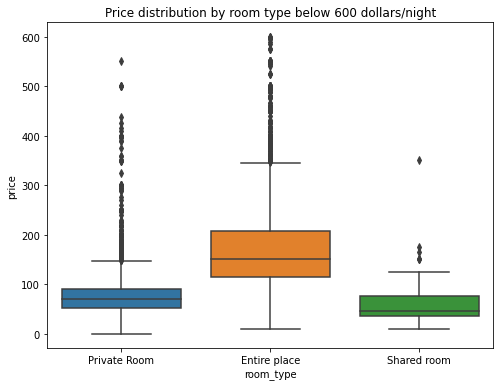

In [ ]:
# Visualize price by room type
plt.figure(figsize = (8,6))

airbnb_600 = airbnb[airbnb['price'] < 600]

sns.boxplot(x = 'room_type', y = 'price', data = airbnb_600)

plt.title('Price distribution by room type below 600 dollars/night')
plt.show()

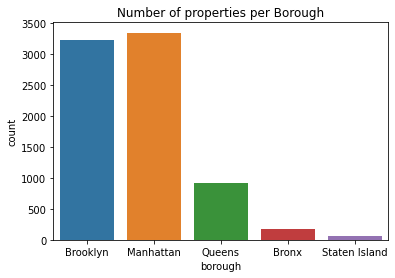

In [ ]:
# Count the amount 
sns.countplot(x = 'borough', data = airbnb)
plt.title('Number of properties per Borough')
plt.show()

In [ ]:
# Convert to datetime
airbnb['listing_added'] = pd.to_datetime(airbnb['listing_added'])
airbnb['listing_year'] = airbnb['listing_added'].dt.year

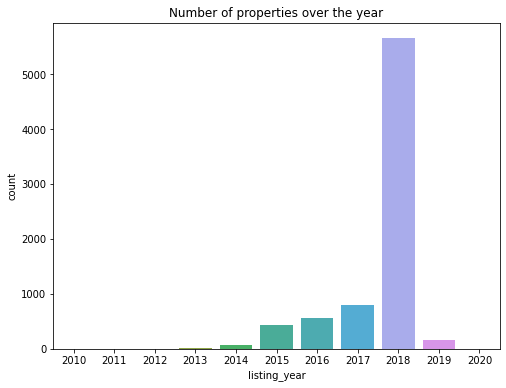

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'listing_year', data = airbnb)
plt.title('Number of properties over the year')
plt.show()

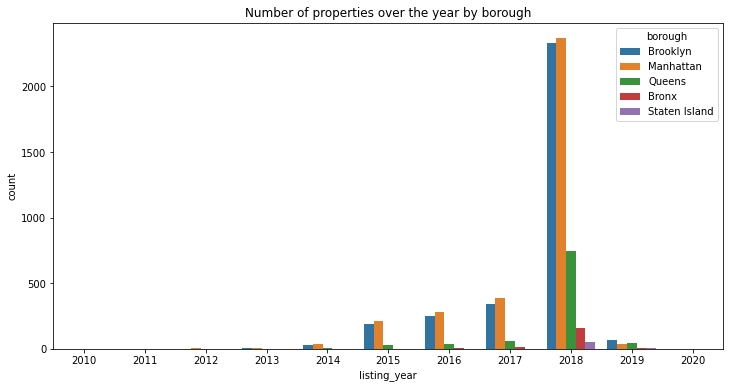

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'listing_year', data = airbnb, hue = 'borough')
plt.title('Number of properties over the year by borough')
plt.show()

By merely looking at the data, we can already diagnose a range of potential problems down the line such as:

<br>

_Data type problems:_

- **Problem 1**: We can see that the `coordinates` column is probably a string (`str`) - most mapping functions require a latitude input, and longitude input, so it's best to split this column into two and convert the values to `float`.
- **Problem 2**: Similar to `coordinates` - the `price` column also is a string with `$` attached to each price point, we need to convert that to `float` if we want a good understanding of the dataset. 
- **Problem 3**: We need to make sure date columns (`last_review` and `listing_added`) are in `datetime` to allow easier manipulation of data data.

<br>

_Missing data problems:_

- **Problem 4**: We can see that there are missing data in some columns, we'll get a better bird's eye view of that down the line.

<br>

_Text/categorical data problems:_


- **Problem 5**: To be able to visualize number of listings by boroughs - we need to separate neighborhoud name from borough name in `neighbourhood_full` column.
- **Problem 6**: Looking at `room_type`, let's replace those values to make them `'Shared Room'`, `'Private Home/Apartment'`, `'Private Room'` and `'Hotel Room'`.

There are a variety of ways of dealing with missing data that is dependent on type of missingness, as well as the business assumptions behind our data - our options could be:

- Dropping missing data (if the data dropped does not impact or skew our data)
- Setting to missing and impute with statistical measures (median, mean, mode ...)
- Imputing with more complex algorithmic/machine learning based approaches
- Impute based on business assumptions of our data

## **Our to do list:**

_Data type problems:_

- **Task 1**: Split `coordinates` into 2 columns and convert them to `float`
- **Task 2**: Remove `$` from `price` and convert it to `float`
- **Task 3**: Convert `listing_added` and `last_review` to `datetime`

<br>

_Text/categorical data problems:_

- **Task 4**: We need to collapse `room_type` into correct categories
- **Task 5**: Divide `neighbourhood_full` into 2 columns and making sure they are clean

<br>

_Data range problems:_

- **Task 6**: Make sure we set the correct maximum for `rating` column out of range values

<br>

_Dealing with missing data:_

- **Task 7**: Understand the type of missingness, and deal with the missing data in most of the remaining columns. 

<br>

_Is that all though?_

- We need to investigate if we duplicates in our data
- We need to make sure that data makes sense by applying some sanity checks on our DataFrame 

## **Cleaning data** 

### Data type problems

##### **Task 2:** Remove `$` from `price` and convert it to `float`

To perform this task, we will be using the following methods:

- `.str.strip()` which removes a specified string from each row in a column
- `.astype()`

In [ ]:
# Calculate mean of price without conversion
airbnb['price'].mean()

In [ ]:
# Remove $ from price before conversion to float
airbnb['price'] = airbnb['price'].str.strip("$")
# Print header to make sure change was done
airbnb['price'].head()

0     45
1    135
2    150
3     86
4    160
Name: price, dtype: object

In [ ]:
# Convert price to float
airbnb['price'] = airbnb['price'].astype('float')
# Calculate mean of price after conversion
airbnb['price'].mean()

150.90512217564665

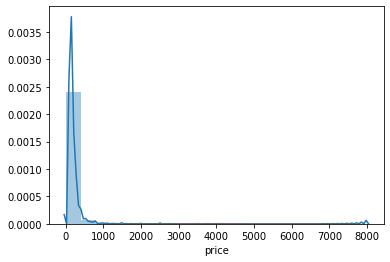

In [ ]:
# Visualize distribution of prices
sns.distplot(airbnb['price'], bins = 20)
plt.show()

##### **Task 3:** Convert `listing_added` and `last_review` columns to `datetime`

To perform this task, we will use the following functions:

- `pd.to_datetime(format = "")`
  - `format` takes in the desired date format `"%Y-%m-%d"`

In [ ]:
# Print header of two columns
airbnb[['listing_added', 'last_review']].head()

,listing_added,last_review
0,2018-06-08,2018-12-12
1,2018-12-25,2019-06-30
2,2018-08-15,NaN
3,2017-03-20,2017-09-23
4,2020-10-23,2019-06-12


In [ ]:
# Convert both columns to datetime
airbnb['listing_added'] = pd.to_datetime(airbnb['listing_added'], format = '%Y-%m-%d')
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'], format = '%Y-%m-%d')

In [ ]:
# Print header and datatypes of both columns again
print(airbnb[['listing_added', 'last_review']].head())
print(airbnb[['listing_added', 'last_review']].dtypes)

  listing_added last_review
0    2018-06-08  2018-12-12
1    2018-12-25  2019-06-30
2    2018-08-15         NaT
3    2017-03-20  2017-09-23
4    2020-10-23  2019-06-12
listing_added    datetime64[ns]
last_review      datetime64[ns]
dtype: object


##### **Task 5:** Divide `neighbourhood_full` into 2 columns and making sure they are clean

In [ ]:
# Print header of column
airbnb['neighbourhood_full'].head()

0           Brooklyn, Flatlands
1    Manhattan, Upper West Side
2    Brooklyn, Brooklyn Heights
3    Manhattan, Upper West Side
4    Manhattan, Lower East Side
Name: neighbourhood_full, dtype: object

In [ ]:
# Split neighbourhood_full
borough_neighbourhood = airbnb['neighbourhood_full'].str.split(",", expand = True)
borough_neighbourhood.head()

,0,1
0,Brooklyn,Flatlands
1,Manhattan,Upper West Side
2,Brooklyn,Brooklyn Heights
3,Manhattan,Upper West Side
4,Manhattan,Lower East Side


In [ ]:
# Create borough and neighbourhood columns
airbnb['borough'] = borough_neighbourhood[0]
airbnb['neighbourhood'] = borough_neighbourhood[1]
# Print header of columns
airbnb[['neighbourhood_full', 'borough', 'neighbourhood']].head()

,neighbourhood_full,borough,neighbourhood
0,"Brooklyn, Flatlands",Brooklyn,Flatlands
1,"Manhattan, Upper West Side",Manhattan,Upper West Side
2,"Brooklyn, Brooklyn Heights",Brooklyn,Brooklyn Heights
3,"Manhattan, Upper West Side",Manhattan,Upper West Side
4,"Manhattan, Lower East Side",Manhattan,Lower East Side


In [ ]:
# Drop neighbourhood_full column
airbnb.drop('neighbourhood_full', axis = 1, inplace = True)

## **Q&A**

From a common sense perspective, the most predictive factor for a room's price is the `room_type` column, so let's visualize how price varies by room type with `sns.boxplot()` which displays the following information:


<p align="center">
<img src="https://github.com/adelnehme/cleaning-data-in-python-live-training/blob/master/boxplot.png?raw=true" alt = "DataCamp icon" width="80%">
</p>




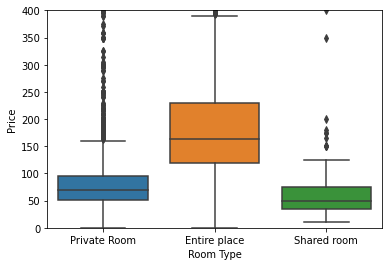

In [ ]:
# Visualize relationship between price and room_type
sns.boxplot(x = 'room_type', y = 'price', data = airbnb)
plt.ylim(0, 400)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()